# SuperMarket Sales Analysis 
## Objectives
1. Clean the data
2. Get basic info on the data
3. Using the 'Product line' Column, find which product line brings in the highest gross income using a bar chart
4. Find out what gender brings in more money using a doughnut chart
5. Total sales for January, Febuary and March
6. City with highest sales
7. What branch has the most sales
8. Find out customers that are liable to churn with the 'ratings' column
9. Model Training 

In [2]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



In [3]:
# Get the data
data = pd.read_csv(r"C:\Users\YOMI\Downloads\supermarket_sales - Sheet1.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# 2 Info on the data
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [10]:
# Check for null values
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Product Line with the highest grossing income

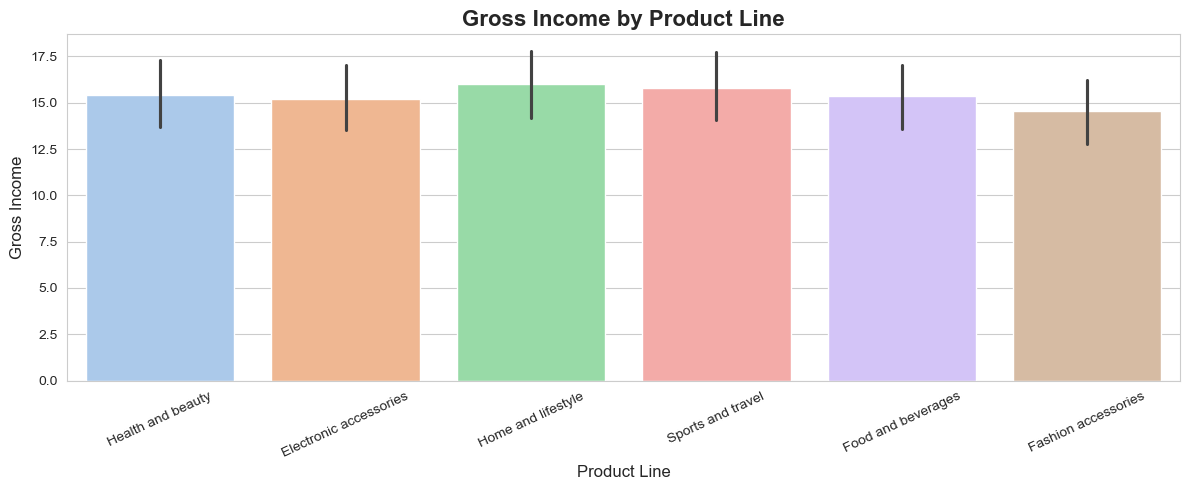

In [13]:
# What product line has the highest gross income using bar chart.

# Set Seaborn theme for aesthetics
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 5))
sns.barplot(x='Product line', y='gross income', data=data, hue='Product line', dodge=False, palette='pastel', legend=False)

# Add titles and labels
plt.title('Gross Income by Product Line', fontsize=16, fontweight='bold')
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Gross Income', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=25)

# Improve layout and display the plot
plt.tight_layout()
plt.show()


## Plotting a Doughnut chart to visualize the Gender with the highest Grossing income

C:\Users\YOMI\AppData\Local\Temp\ipykernel_3768\1332162021.py:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  centre_circle = plt.Circle((0, 0), 0.70, color='white', edgecolor='white')


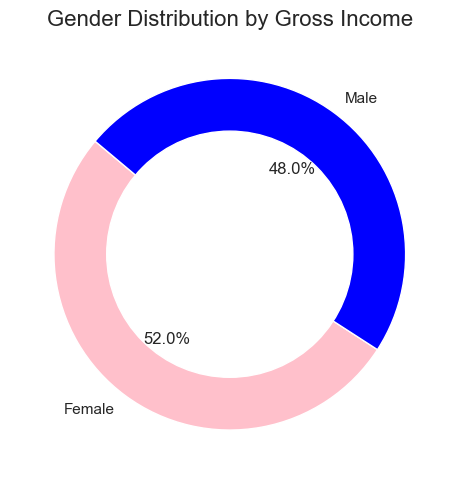

In [16]:
# Grouping the data by Gender and summing up the Gross Income
gender_income = data.groupby('Gender')['gross income'].sum()

# Set the Seaborn theme for aesthetics
sns.set_theme(style="whitegrid")

# Create a doughnut chart
plt.figure(figsize=(5, 5))
plt.pie(gender_income, labels=gender_income.index, autopct='%1.1f%%', startangle=140, colors= ['pink', 'blue'])
# Draw a white circle in the center to create the doughnut effect
centre_circle = plt.Circle((0, 0), 0.70, color='white', edgecolor='white')
plt.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Distribution by Gross Income', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


## Total Sales for January, Febuary and March

In [19]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data.Date.dt.month # for the month data

# Convert 'Month' column to string if it's not already
data['Month'] = data['Month'].astype(str)

# Rename multiple values in a column
data['Month'] = data['Month'].replace({'1': 'January', '2': 'February', '3': 'March'})

data.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February


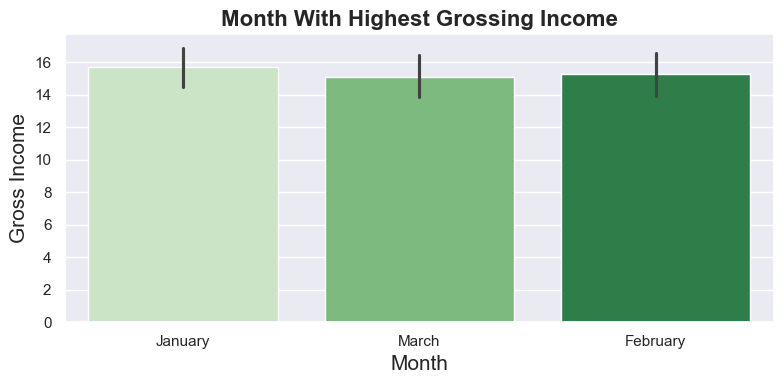

In [21]:
# Visualizing
# Set Seaborn theme for aesthetics
sns.set_style("darkgrid")

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Month', y='gross income', data=data, hue='Month', dodge=False, palette='Greens', legend=False)

# Add titles and labels
plt.title('Month With Highest Grossing Income', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Gross Income', fontsize=15)

# Improve layout and display the plot
plt.tight_layout()
plt.show()


## City with highest Gross Income

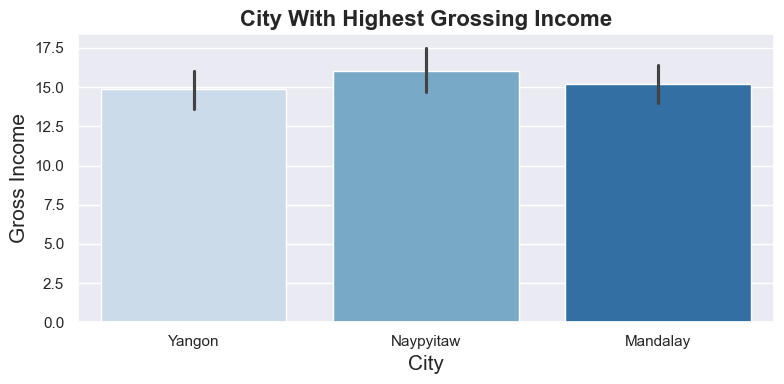

In [24]:
# Visualizing
# Set Seaborn theme for aesthetics
sns.set_style("darkgrid")

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='City', y='gross income', data=data, hue='City', dodge=False, palette='Blues', legend=False)

# Add titles and labels
plt.title('City With Highest Grossing Income', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=15)
plt.ylabel('Gross Income', fontsize=15)

# Improve layout and display the plot
plt.tight_layout()
plt.show()

## Branch with Highest Grossing Income

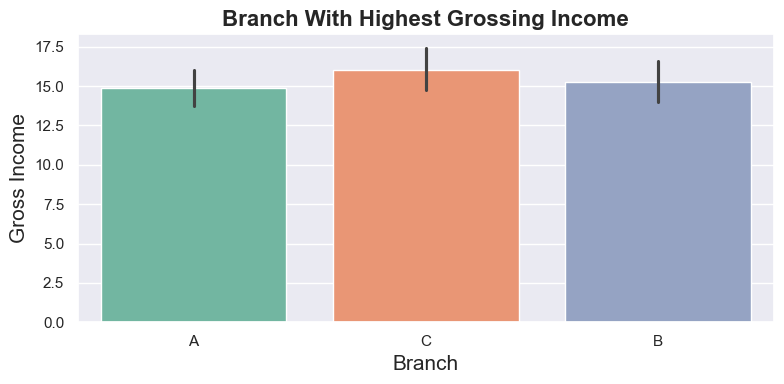

In [26]:
# Visualizing
# Set Seaborn theme for aesthetics
sns.set_style("darkgrid")

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Branch', y='gross income', data=data, hue='Branch', dodge=False, palette='Set2', legend=False)

# Add titles and labels
plt.title('Branch With Highest Grossing Income', fontsize=16, fontweight='bold')
plt.xlabel('Branch', fontsize=15)
plt.ylabel('Gross Income', fontsize=15)

# Improve layout and display the plot
plt.tight_layout()
plt.show()

## Finding out Customers Liable to Churn 

In [26]:
# Define churn: low or zero rating 
threshold = 5.0  # Define a threshold 
data['Churn'] = data['Rating'].apply(lambda x: 'Yes' if x < threshold else 'No')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Churn
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January,No
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March,No
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March,No
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January,No
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February,No


In [28]:
pip install openpyxl


In [34]:
data.to_excel('new_table.xlsx', index=False)  # Saves the DataFrame to an Excel file
import os
print(os.getcwd())


C:\Users\YOMI\Documents\Python- Jupyter


In [30]:
# Number of Customers that churned and didn't 
churn_counts = data['Churn'].value_counts()
print(churn_counts)

Churn
No     847
Yes    153
Name: count, dtype: int64


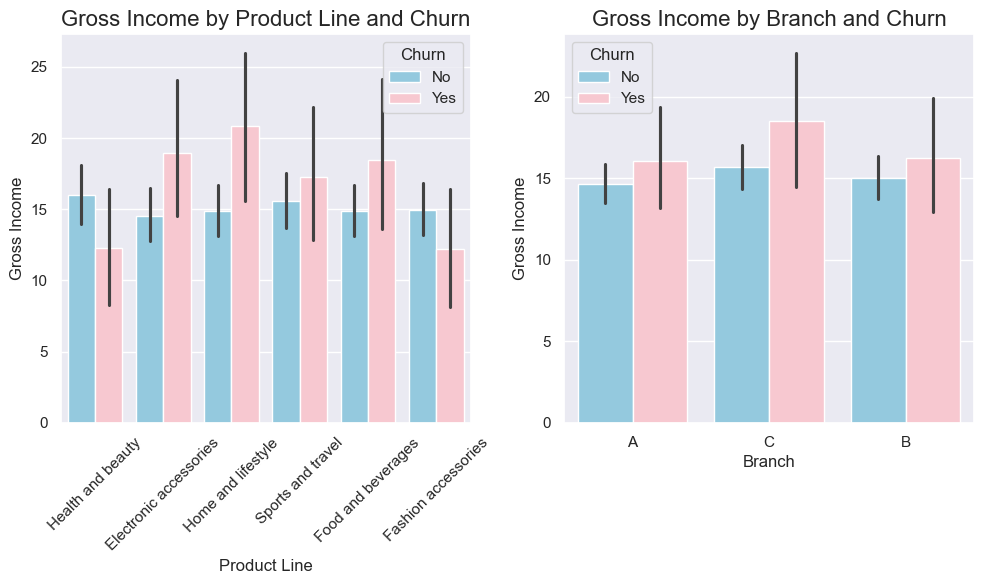

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
color= {
    'Yes': 'pink',
    'No': 'skyblue'
}

# Churn by Product Line
sns.barplot(x='Product line', y='gross income', hue='Churn', data=data, palette=color, ax=ax[0])
ax[0].set_title('Gross Income by Product Line and Churn', fontsize=16)
ax[0].set_xlabel('Product Line', fontsize=12)
ax[0].set_ylabel('Gross Income', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend(title='Churn')

# Churn by Branch
sns.barplot(x='Branch', y='gross income', hue='Churn', data=data, palette=color, ax=ax[1])
ax[1].set_title('Gross Income by Branch and Churn', fontsize=16)
ax[1].set_xlabel('Branch', fontsize=12)
ax[1].set_ylabel('Gross Income', fontsize=12)
ax[1].legend(title='Churn')

plt.tight_layout()
plt.show()

## Using Random Forest and Suppoer Vcetor machine to Train the model

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
X = data[['Tax 5%']]  # independent Variable
y = data['gross income']  # dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)


In [63]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest - Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest - R-squared:", r2_score(y_test, y_pred_rf))

# Get predictions for the test set
rf_predictions = rf_model.predict(X_test)
# print("Random Forest Predictions: ", rf_predictions)

Random Forest - Mean Absolute Error: 0.027575766666667202
Random Forest - R-squared: 0.9999745606885756


In [67]:
# Support Vector Machine Regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

print("SVM - Mean Absolute Error:", mean_absolute_error(y_test, y_pred_svr))
print("SVM - R-squared:", r2_score(y_test, y_pred_svr))

# Predictions for the test set
svm_predictions = svr_model.predict(X_test)
# print("SVM Predictions: ", svm_predictions)

SVM - Mean Absolute Error: 0.19223909568480038
SVM - R-squared: 0.9957518184495371


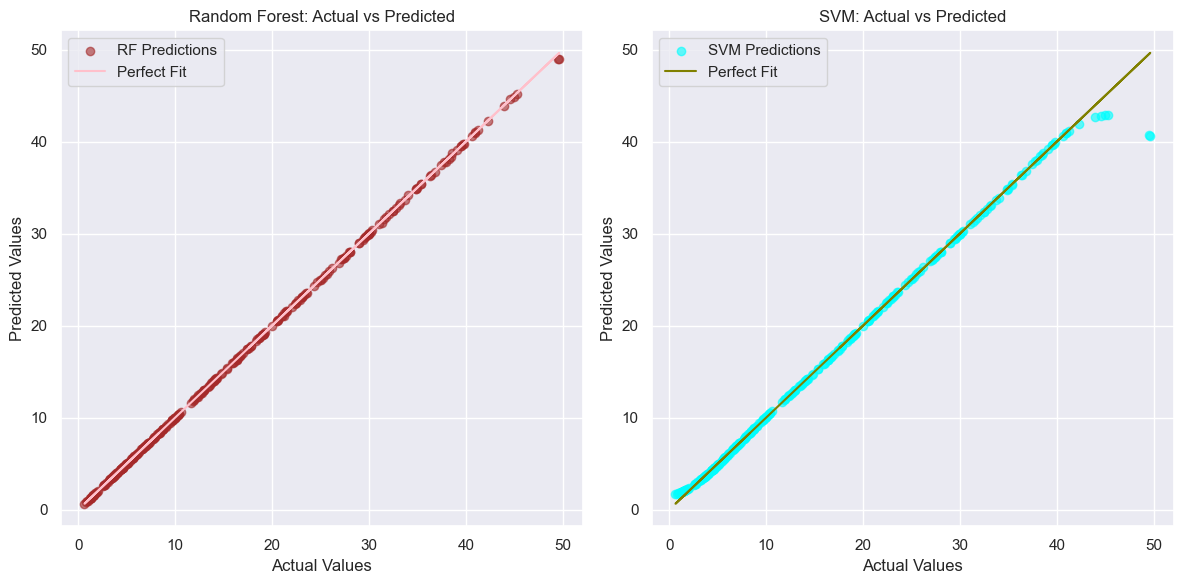

In [69]:
# Visualizing the results between actual and predicted
plt.figure(figsize= (12, 6))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions, color='brown', alpha=0.6, label='RF Predictions')
plt.plot(y_test, y_test, color='pink', label='Perfect Fit')  # Diagonal line
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# SVM
plt.subplot(1, 2, 2)
plt.scatter(y_test, svm_predictions, color='cyan', alpha=0.6, label='SVM Predictions')
plt.plot(y_test, y_test, color='olive', label='Perfect Fit')  # Diagonal line
plt.title('SVM: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()



From our visualizations, we can see that Random Forest is the best model for this data set. 